In [1]:
import setGPU

import tensorflow as tf

setGPU: Setting GPU to: 1


/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3

In [2]:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

In [3]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4992 - acc: 0.8252
Epoch 2/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3710 - acc: 0.8662
Epoch 3/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3328 - acc: 0.8784
Epoch 4/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3122 - acc: 0.8855
Epoch 5/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2935 - acc: 0.8910


In [4]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.3601 - acc: 0.8667


[0.3600726583600044, 0.8667]

In [5]:
training_images=training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [6]:
convModel = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation=tf.nn.relu, input_shape=(28, 28, 1)),
                                tf.keras.layers.MaxPooling2D(2, 2),
                                tf.keras.layers.Conv2D(16, (3, 3), activation=tf.nn.relu),
                                tf.keras.layers.MaxPooling2D(2, 2),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
convModel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
convModel.summary()
convModel.fit(training_images, training_labels, epochs=10)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [7]:
convModel.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.2675 - acc: 0.9045


[0.2674796857178211, 0.9045]

In [8]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


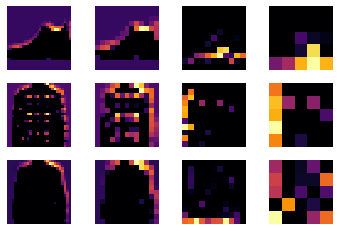

In [10]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(3, 4)

first_image = 0
second_image = 7
third_image = 26

conv_number = 1

layer_outputs = [layer.output for layer in convModel.layers]
activation_model = tf.keras.models.Model(inputs=convModel.input, outputs=layer_outputs)
for x in range(0, 4):
    f1 = activation_model.predict(test_images[first_image].reshape([1, 28, 28, 1]))[x]
    axarr[0, x].imshow(f1[0,:,:,conv_number], cmap='inferno')
    axarr[0,x].axis('off')
    axarr[0, x].grid(False)
    
    f2 = activation_model.predict(test_images[second_image].reshape([1, 28, 28, 1]))[x]
    axarr[1, x].imshow(f2[0,:,:,conv_number], cmap='inferno')
    axarr[1,x].axis('off')
    axarr[1, x].grid(False)
    
    f3 = activation_model.predict(test_images[third_image].reshape([1, 28, 28, 1]))[x]
    axarr[2, x].imshow(f3[0,:,:, conv_number], cmap='inferno')
    axarr[2,x].axis('off')
    axarr[2, x].grid(False)